In [60]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the insurance dataset
df = pd.read_csv("insurance.csv")

In [20]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [61]:
# Remove missing values
df = df.dropna()

# Calculate Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Align the DataFrame and the Series on the same axis
left, right = df.align(Q1, axis=0, copy=False)
_, right = df.align(Q3, axis=0, copy=False)

# Check for outliers
outlier_mask = ~((left < (right - 1.5 * IQR)) | (left > (right + 1.5 * IQR)))
outlier_mask = outlier_mask.any(axis=1)

# Print the data without outliers
print(df[~outlier_mask])

C:\Users\admin\AppData\Local\Temp\ipykernel_9740\4101868896.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_mask = ~((left < (right - 1.5 * IQR)) | (left > (right + 1.5 * IQR)))


Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


C:\Users\admin\AppData\Local\Temp\ipykernel_9740\4101868896.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[~outlier_mask])


In [23]:
import seaborn as sns

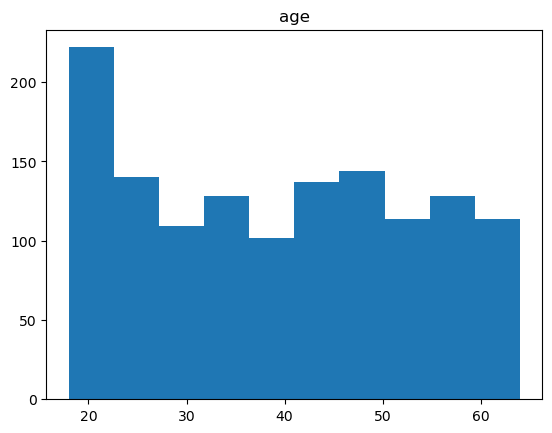

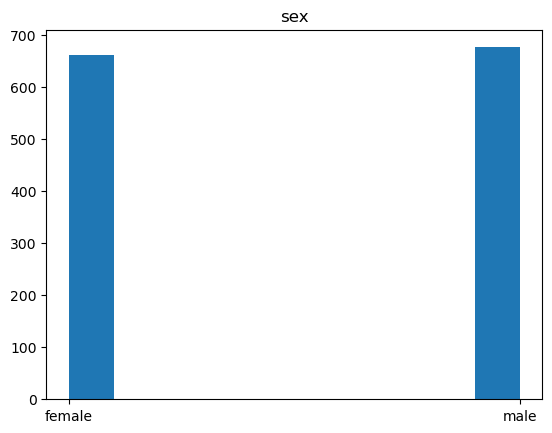

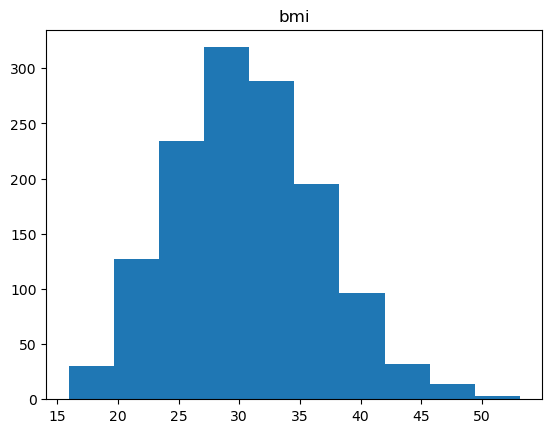

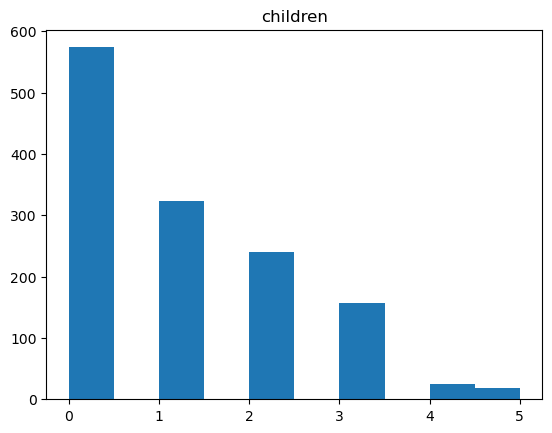

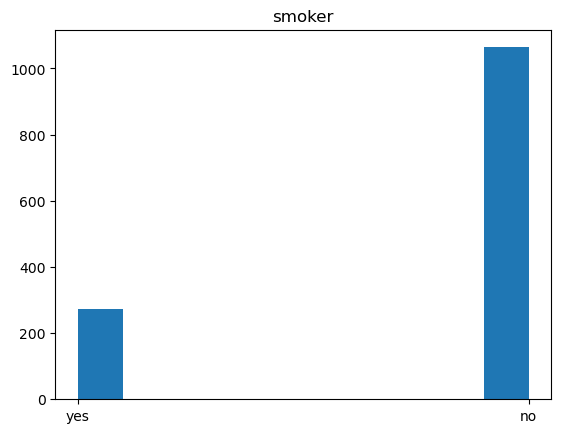

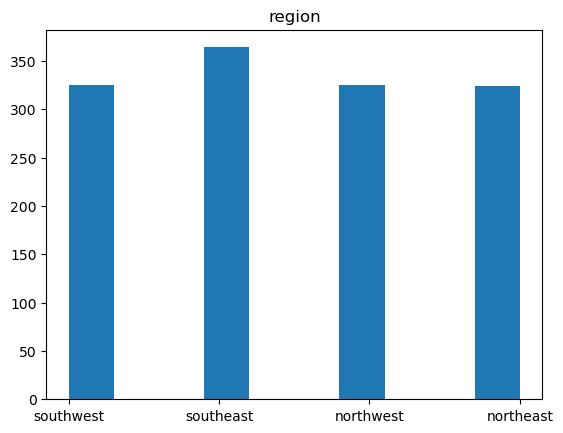

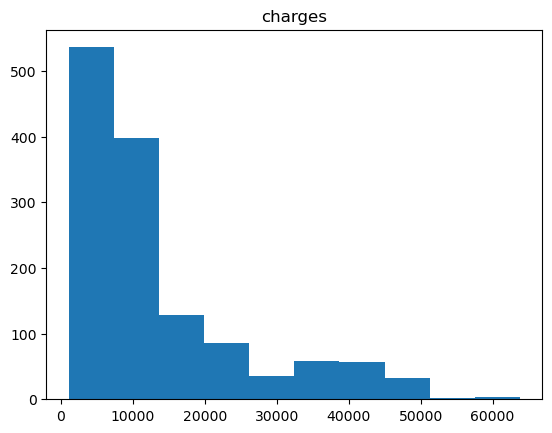

In [24]:
# Plot histograms for each variable
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:>

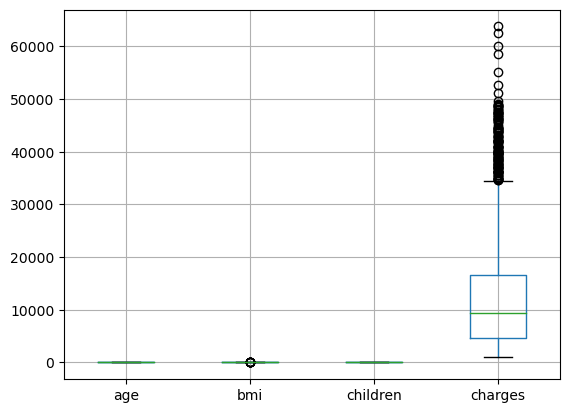

In [26]:
# Plot a boxplot for each column in the dataframe
df.boxplot()

In [39]:
# Summarize the data using statistical measures
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


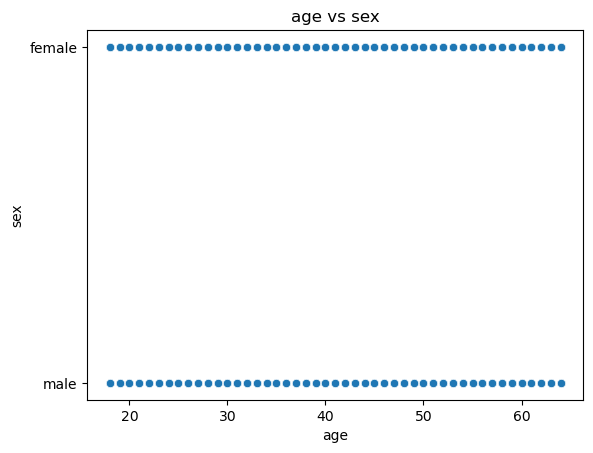

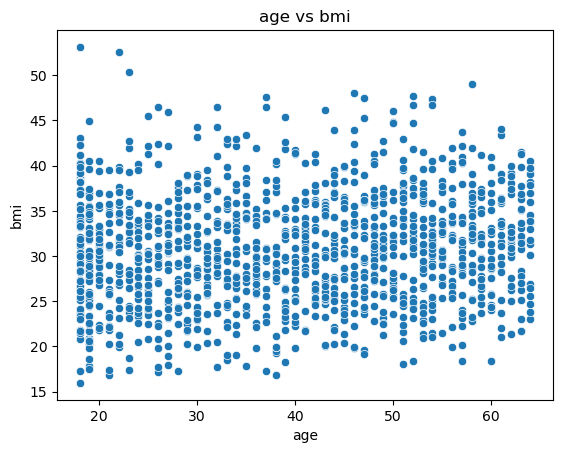

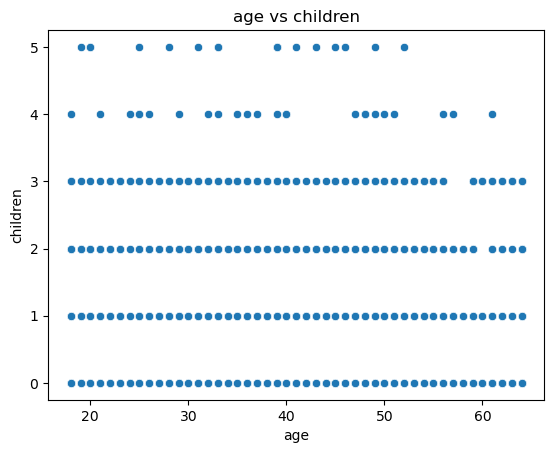

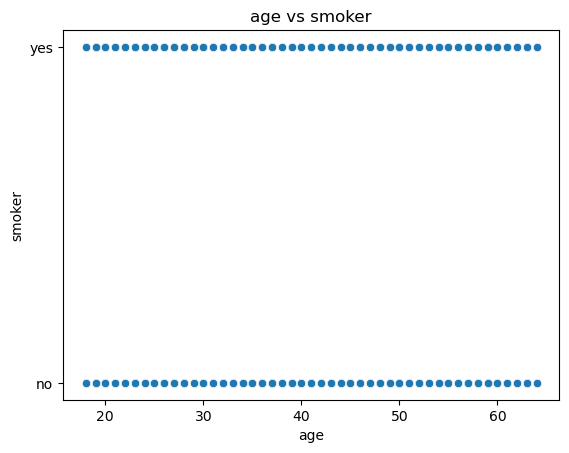

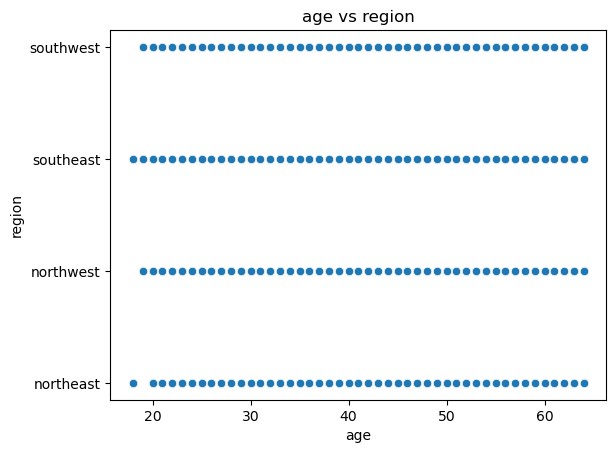

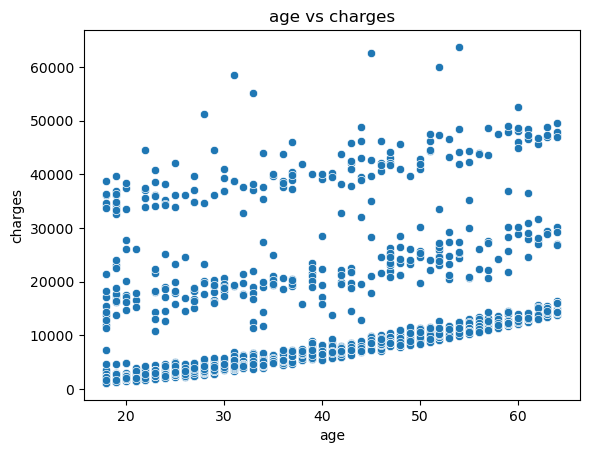

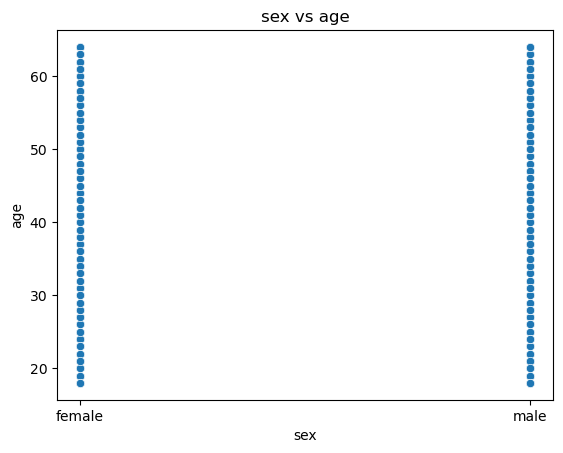

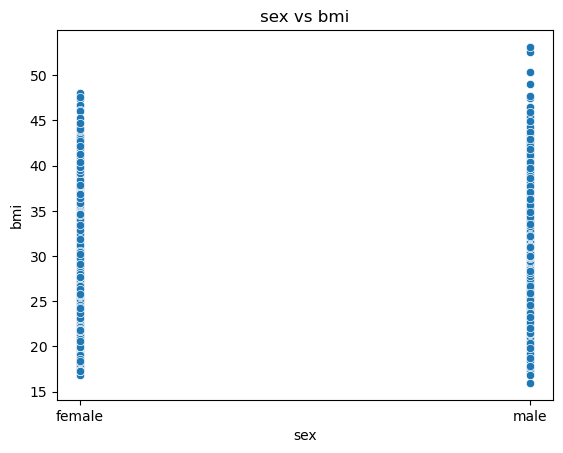

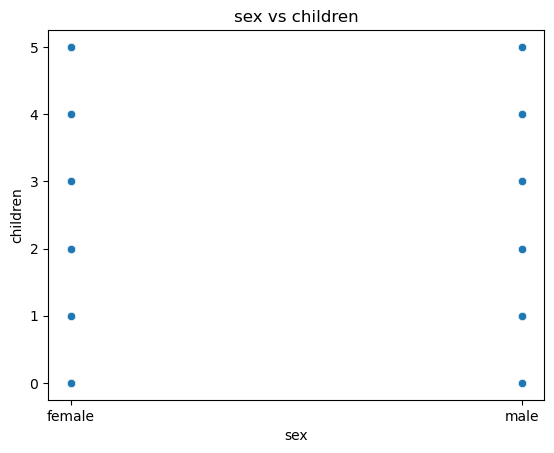

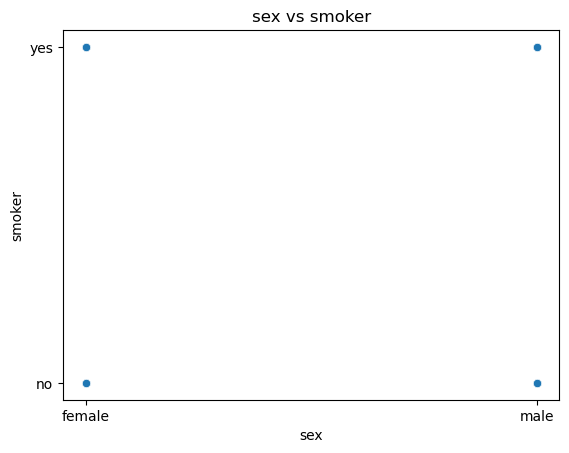

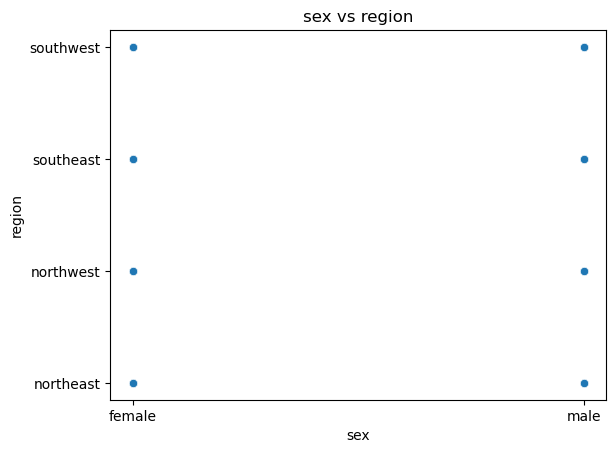

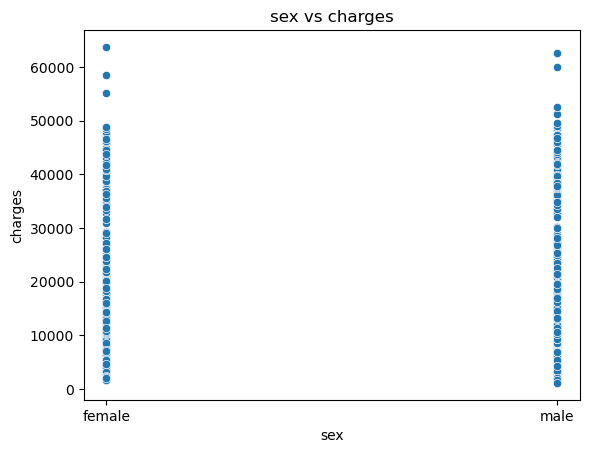

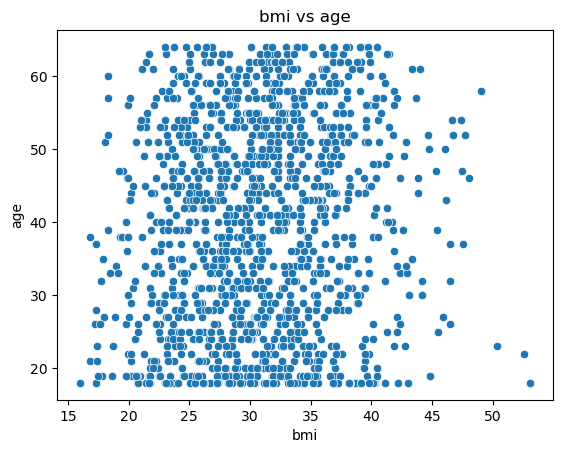

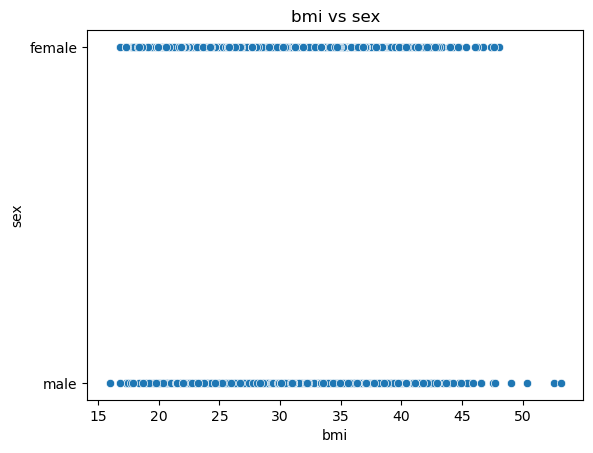

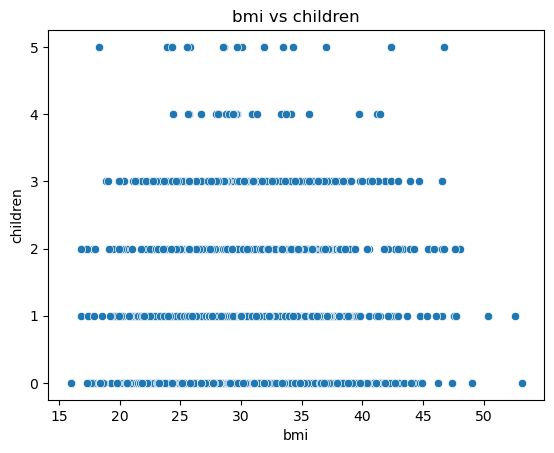

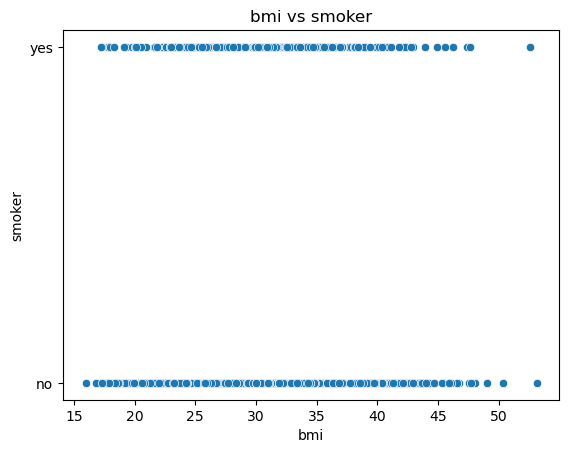

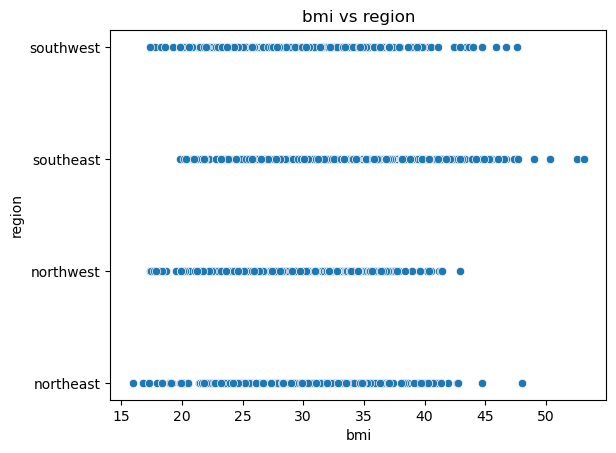

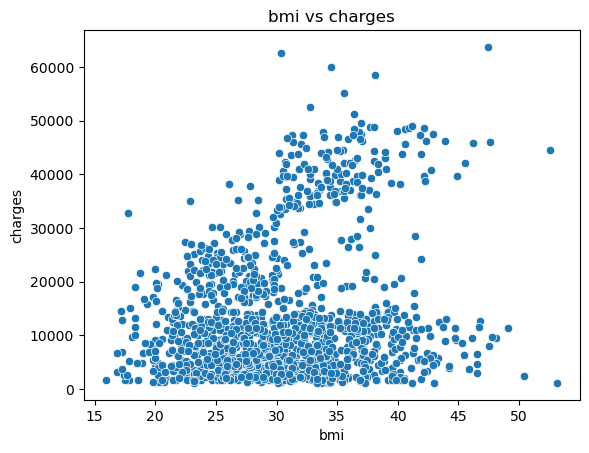

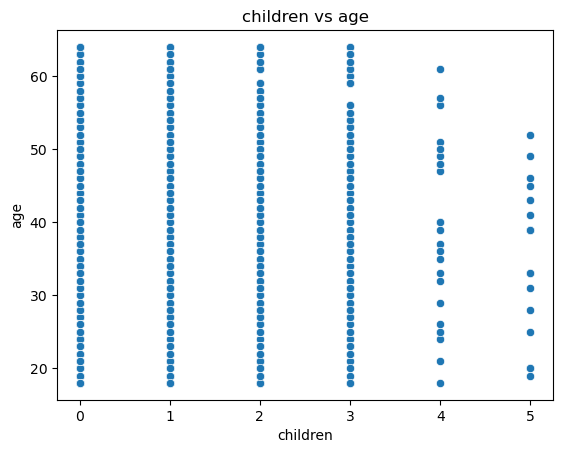

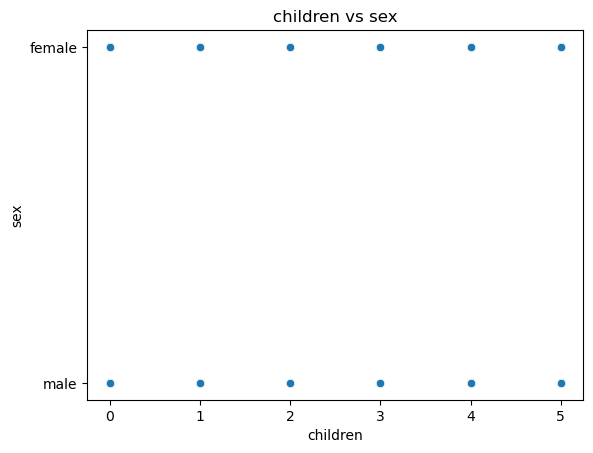

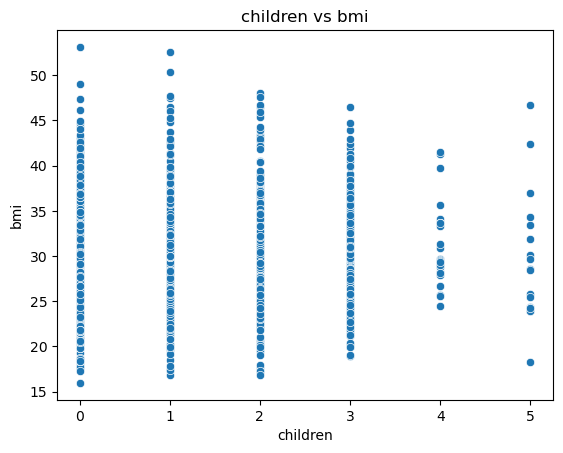

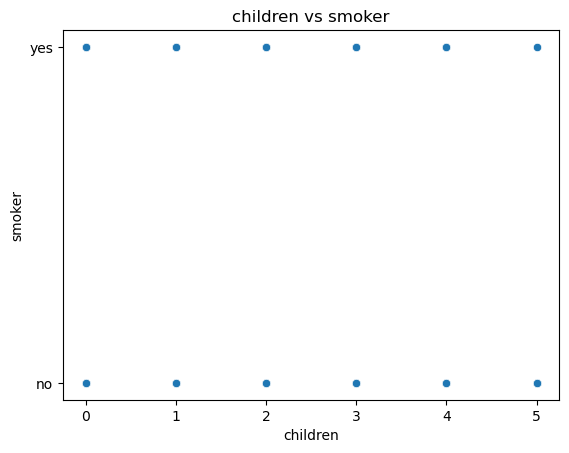

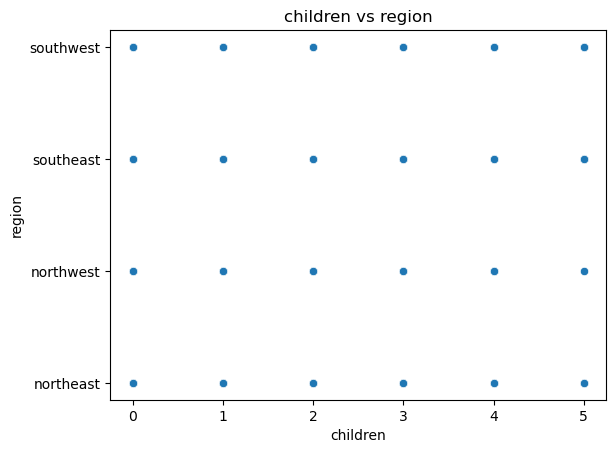

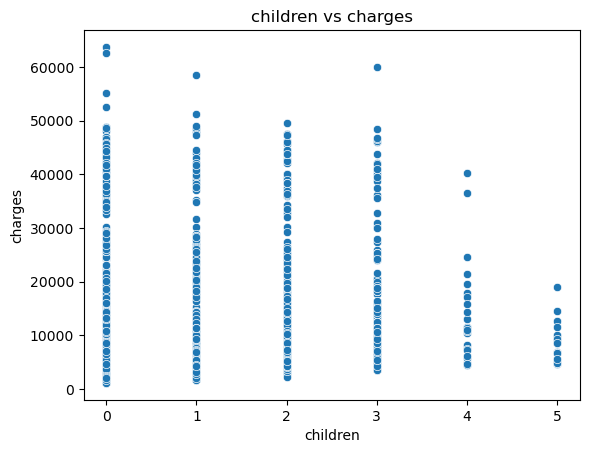

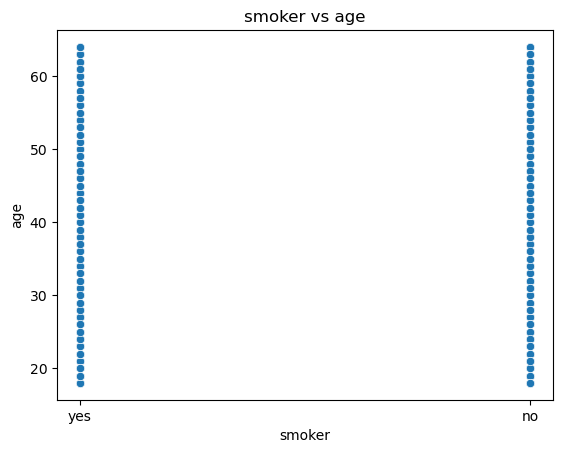

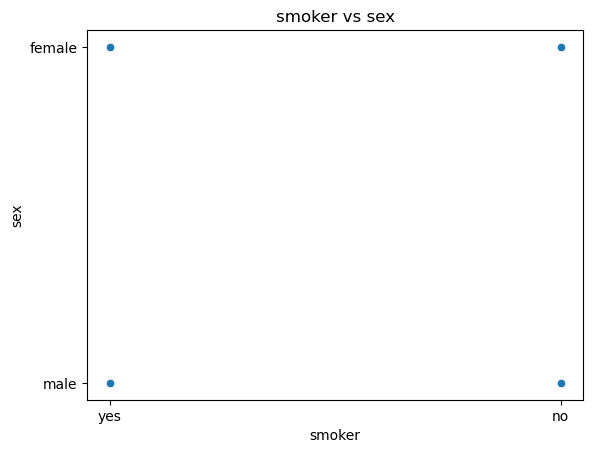

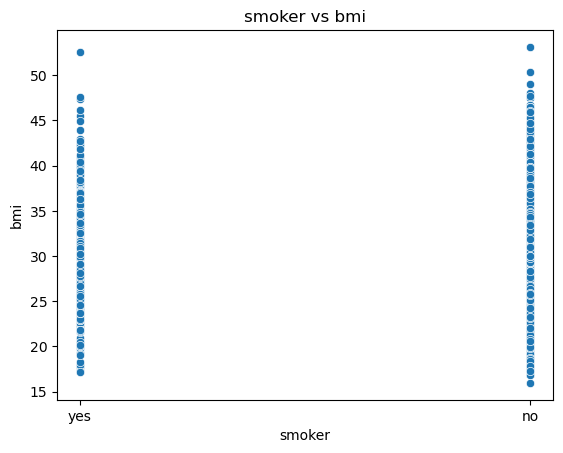

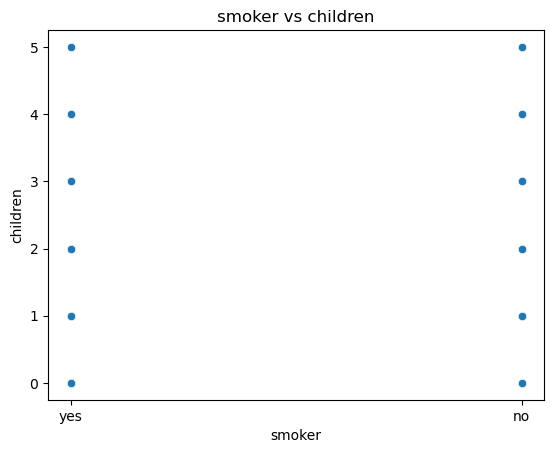

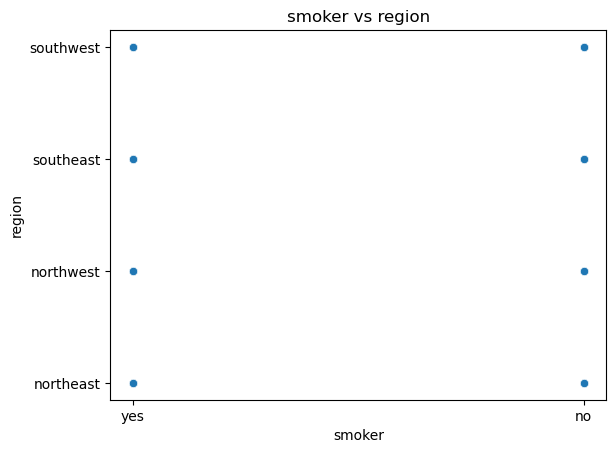

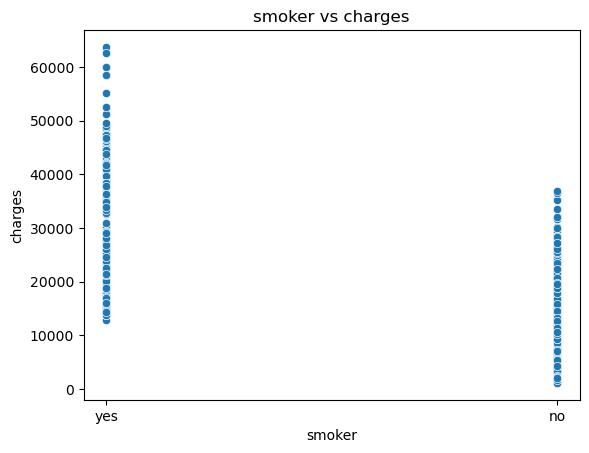

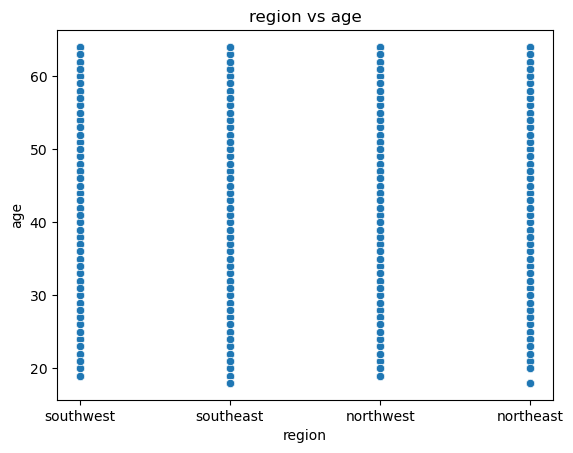

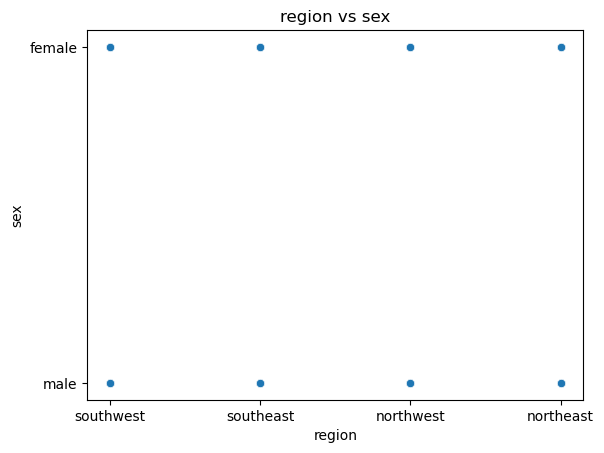

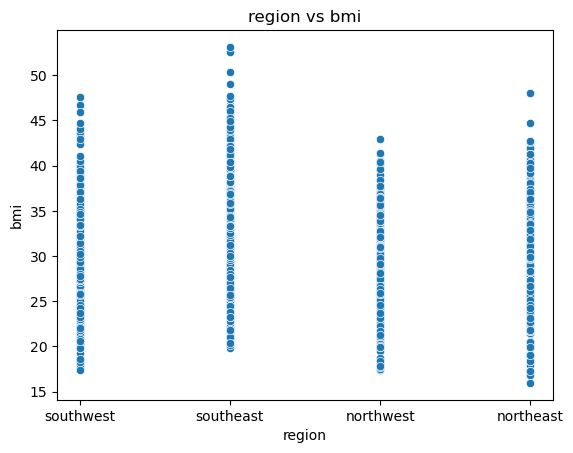

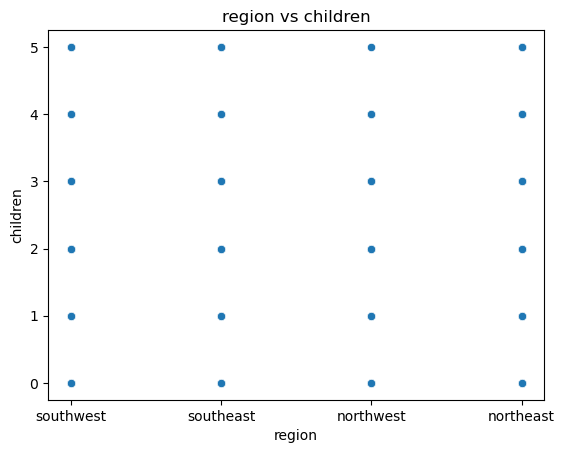

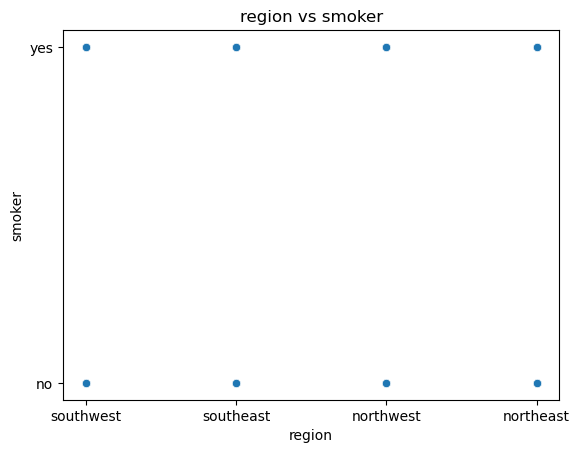

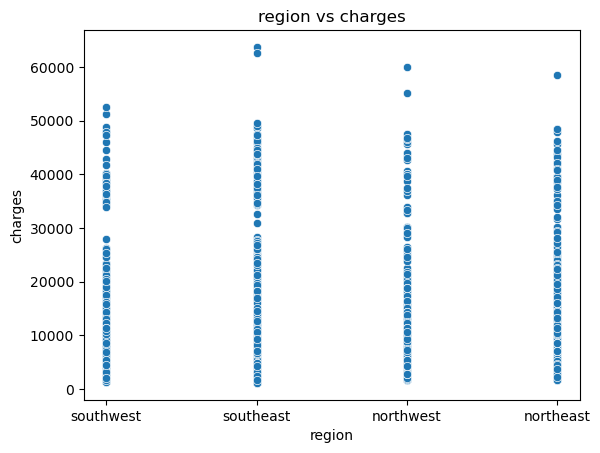

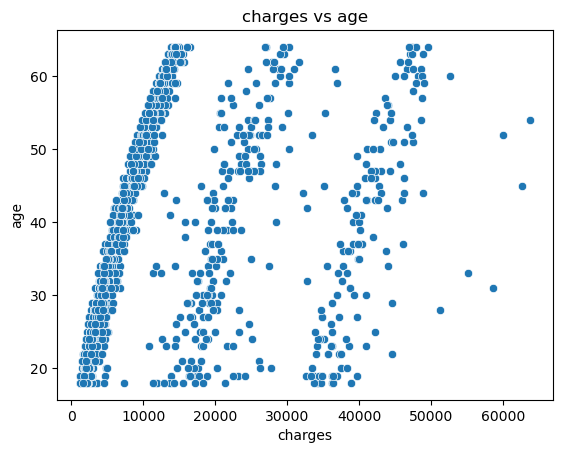

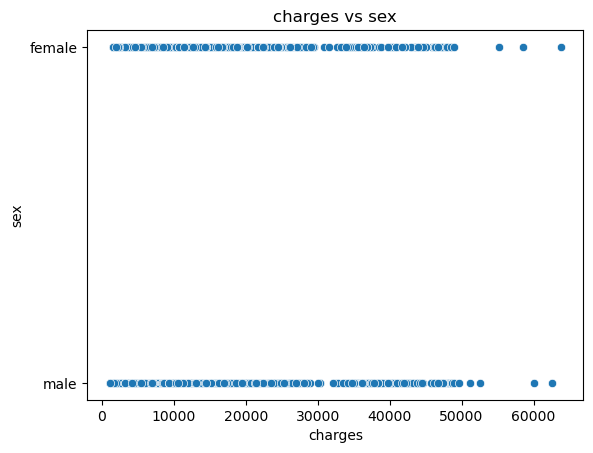

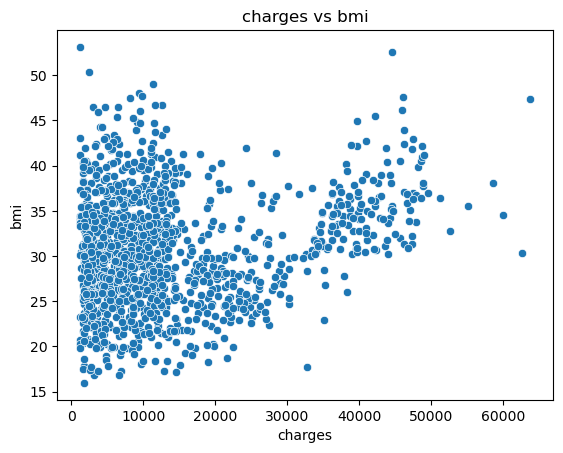

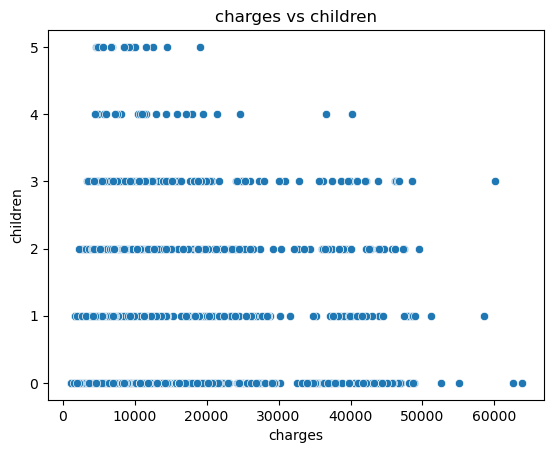

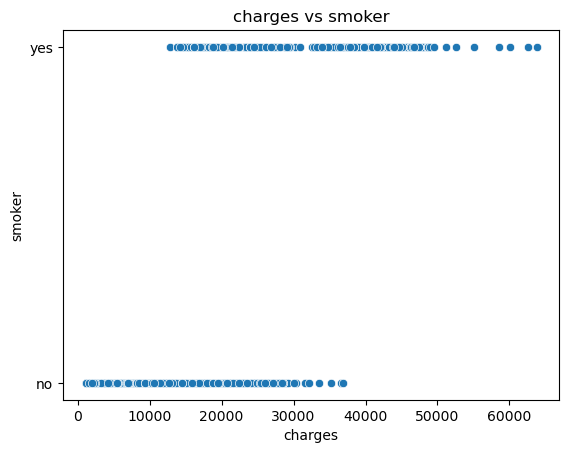

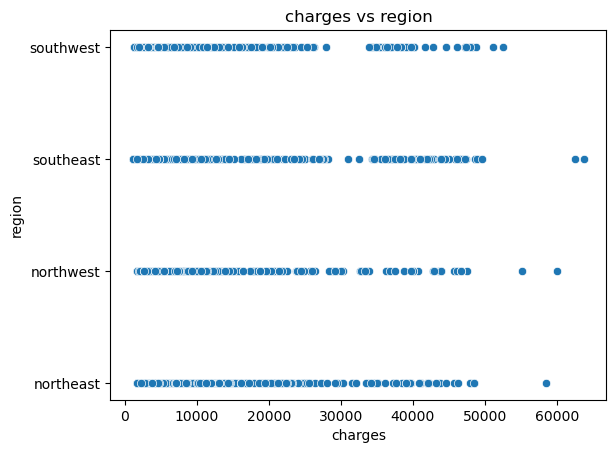

In [28]:
#bivariate analysis
# Plot scatter plots for each pair of variables
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f"{col1} vs {col2}")
            plt.show()

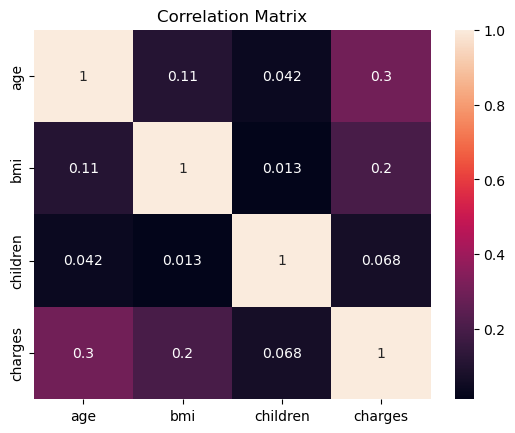

In [29]:
# Plot a correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [30]:
#multivariate analysis
from sklearn.decomposition import PCA

In [34]:
import numpy as np

In [41]:
df = pd.get_dummies(df, columns=["sex"])

In [46]:
from sklearn.preprocessing import LabelEncoder

# Find all the columns with string values in the data
string_columns = df.columns[df.dtypes == 'object']

# Encode the string values in each of the columns
for col in string_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)

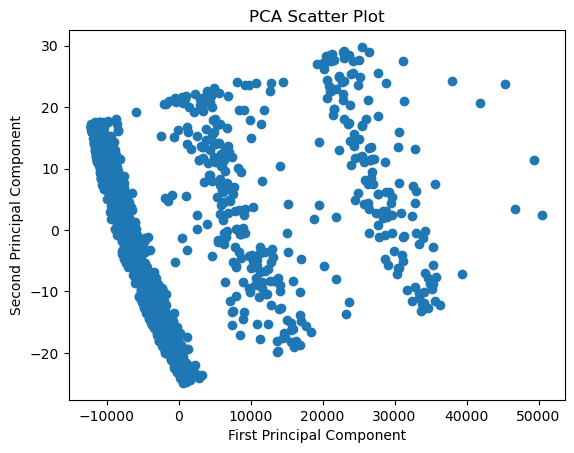

In [48]:
# Plot the scatter plot
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()